In [98]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [100]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [101]:
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE
# comment the downloading and to_pickle of transaction data unless we need to use it again.  I will take 3 years instead of 1.
#df = get_historical_data(list_of_tickers, output_format='pandas', start = '2017-01-01', end = '2019-12-31', close_only = True, volume= False)
#df.to_pickle("./iex3years")

In [102]:
iex_df = pd.read_pickle("./iex3years")
iex_df.drop(columns=['volume'], level=1, inplace=True)
iex_df.columns = iex_df.columns.droplevel(1)
iex_df.sort_index(ascending = True, inplace = True)
iex_df.head(5)

,SPY,AGG
date,,
2017-01-03,225.24,108.17
2017-01-04,226.58,108.20
2017-01-05,226.40,108.65
2017-01-06,227.21,108.29
2017-01-09,226.46,108.47


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [105]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
daily_return = iex_df.pct_change().dropna()
daily_return.head()

,SPY,AGG
date,,
2017-01-04,0.005949,0.000277
2017-01-05,-0.000794,0.004159
2017-01-06,0.003578,-0.003313
2017-01-09,-0.003301,0.001662
2017-01-10,0.000000,-0.000277


In [122]:
# Calculate volatility
# YOUR CODE HERE
daily_std = daily_return.std()
daily_std

SPY    0.008114
AGG    0.001879
dtype: float64

In [107]:
# Save the last day's closing price
# YOUR CODE HERE
last_day_price = iex_df.iloc[-1] # in later calculation, last closing price is not relevant.
last_day_price

SPY    321.86
AGG    112.37
Name: 2019-12-31 00:00:00, dtype: float64

In [142]:
# If my portfolio is $1, my portfolio should invest $.6 into SPY and $0.4 into AGG no matter what the latest price is:
# Therefore, last closing price is not relevant.  The only thing relevant is mean and std of daily return.
SPY_sim = np.random.normal(daily_return.mean()[0], daily_std[0],252*30*500).reshape(252*30,500)
AGG_sim = np.random.normal(daily_return.mean()[1], daily_std[1],252*30*500).reshape(252*30,500)
# I assume there is no rebalancing everyday and so I do cumprod before combining two stocks.  
# Otherwise, combine daily return (SPY_sim/AGG_sim) first then cumprod:
# Portfolio_return = SPY_sim *0.6 + AGG_sim *0.4
# Portfolio_30_year = np.cumprod(Portfolio_return + 1)
Portfolio_30_year = np.cumprod(SPY_sim+1, axis = 0)*0.6 + np.cumprod(AGG_sim+1, axis = 0)*0.4
Portfolio_30_year_simulation = pd.DataFrame(Portfolio_30_year)
Portfolio_30_year_simulation

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.001889,0.996177,0.996200,1.001302,0.999066,0.993803,1.002189,1.007055,1.004795,1.010249,...,0.997700,1.003669,0.998770,1.000179,1.006695,1.005999,0.994020,1.001772,1.000185,0.999090
1,1.000646,0.990122,1.007258,1.004757,0.999660,0.987390,0.999152,1.000858,1.011952,1.008766,...,1.007843,0.997901,0.996040,1.005467,1.013741,1.006232,0.985998,0.999115,1.001996,0.988146
2,0.987563,0.992321,1.008569,0.997911,0.998070,0.988581,0.995759,0.993913,1.003999,1.008602,...,1.007961,1.003897,0.985218,0.998439,1.010870,1.000866,0.985756,0.990923,1.000760,0.989919
3,0.984842,0.998338,1.020197,0.997998,0.995568,0.987399,0.995688,0.996233,1.001720,1.018108,...,0.999678,1.001877,0.987116,0.992469,1.016201,0.999819,0.989973,0.986878,1.006810,0.987301
4,0.982087,0.998520,1.027065,0.990264,0.990422,0.980724,0.998385,0.990229,0.998019,1.012062,...,0.992928,1.005285,0.986471,0.982568,1.014198,1.002809,0.991036,0.996997,1.009036,0.991665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,25.121380,28.816612,5.411092,11.969224,22.750700,32.759718,25.938666,4.446767,3.791483,16.796960,...,85.439295,6.170953,16.789079,15.200878,13.504953,19.236492,49.893471,11.568093,17.458852,6.524404
7556,24.987163,28.745450,5.418906,11.954650,22.873411,32.836908,25.970915,4.470314,3.763956,16.813714,...,84.264079,6.229800,17.008006,15.295244,13.534179,19.539421,49.475266,11.577472,17.520600,6.453238
7557,25.409832,29.311517,5.457571,11.848642,22.658892,32.518277,25.957510,4.453293,3.768228,16.915449,...,84.605267,6.227126,17.041552,15.260831,13.753137,19.584616,49.189971,11.414443,17.564626,6.423815
7558,25.037048,29.711454,5.443903,11.864297,22.466297,32.897452,25.954186,4.447317,3.774122,16.819129,...,84.319127,6.224125,17.229136,15.355078,13.790797,19.947497,49.274555,11.502433,17.560377,6.461055


In [143]:
# Setup the Monte Carlo Parameters
# ## No need to go through nested loops.
# number_simulations = 500
# number_records = 252 * 30
# monte_carlo = pd.DataFrame()
# ##

In [144]:
# Run the Monte Carlo Simulation
#for x in range(number_simulations):
    
    # YOUR CODE HERE

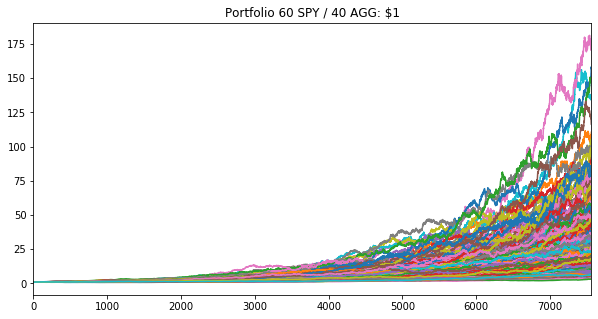

In [146]:
# Visualize the Simulation
# YOUR CODE HERE
Portfolio_30_year_simulation.plot(legend = False, title = "Portfolio 60 SPY / 40 AGG: $1", figsize = (10,5))

In [149]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
simulation_ending_price_30 = Portfolio_30_year_simulation.iloc[-1]
simulation_ending_price_30

0      25.119362
1      29.801176
2       5.428236
3      12.011473
4      22.378158
         ...    
495    19.749476
496    49.508134
497    11.659457
498    17.651064
499     6.494041
Name: 7559, Length: 500, dtype: float64

In [150]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
simulation_ending_price_20 = Portfolio_30_year_simulation.iloc[252*20-1]
simulation_ending_price_20

0       6.631545
1       7.202356
2       2.682349
3       3.299132
4       7.312170
         ...    
495     9.417318
496    12.015403
497     3.431930
498     4.391593
499     2.305049
Name: 5039, Length: 500, dtype: float64

In [151]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
quantile_result = simulation_ending_price_30.quantile(q=[0.05, 0.95])
print(f"The 90% confidence interval of 30-year ending price for $1 investment in portfolio \
is between ${int(quantile_result[0.05])} and ${int(quantile_result[.95])}.")

The 90% confidence interval of 30-year ending price for $1 investment in portfolio is between $7 and $71.


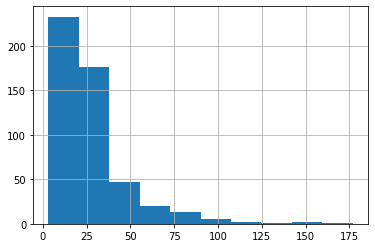

In [152]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
simulation_ending_price_30.hist()

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [160]:
# YOUR CODE HERE
quantile_10_50_90=simulation_ending_price_30.quantile(q = [0.10,0.50,0.90])

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [161]:
# YOUR CODE HERE
return_10_50_90 = quantile_10_50_90*20000
return_10_50_90.astype(int)

0.1     183090
0.5     435998
0.9    1016459
Name: 7559, dtype: int64

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [ ]:
# YOUR CODE HERE

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE